<a href="https://colab.research.google.com/github/imamfaisal21/DataScientist/blob/main/COAL_Time_Series_with_Exogenous_Variabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("/content/Time Series Data.xlsx")
df.shape

(132, 5)

In [ ]:
df.head()

,month,coal_price,china_import_from_indonesia,indonesia_production,china_production
0,2012-01-01,39.55,NaN,NaN,1.811865e+08
1,2012-02-01,39.54,NaN,NaN,2.091627e+08
2,2012-03-01,37.76,NaN,NaN,2.444823e+08
3,2012-04-01,42.40,NaN,NaN,2.638101e+08
4,2012-05-01,42.06,NaN,NaN,2.701020e+08


In [ ]:
data = df[37:-2]
data

,month,coal_price,china_import_from_indonesia,indonesia_production,china_production
37,2015-02-01,27.68,9.466545e+06,36900000.0,1.665578e+08
38,2015-03-01,27.31,1.482177e+07,42040000.0,2.137211e+08
39,2015-04-01,26.45,9.994739e+06,39180000.0,2.211910e+08
40,2015-05-01,25.20,1.121174e+07,38250000.0,2.216386e+08
41,2015-06-01,23.48,1.011390e+07,36790000.0,2.425390e+08
...,...,...,...,...,...
125,2022-06-01,78.90,1.676799e+07,62490000.0,2.681700e+08
126,2022-07-01,76.35,1.345506e+07,61480000.0,2.675892e+08
127,2022-08-01,67.72,1.197043e+07,63070000.0,2.658525e+08
128,2022-09-01,79.25,1.065266e+07,59860000.0,2.789898e+08


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
# ARIMA --> Autoregressive Integrasi Moving Average
# SARIMA --> Seasonal Autoregression Integreted Moving Average

# ARIMAX --> ARIMA with Exogenous Variabel
# SARIMAX --> SARIMA with Exogenous Variabel

In [ ]:
#Training --> Bulan Februari 2015 - Desember 2021
train = data.iloc[:-10]
# Testing -> Januari 2022 - Oktober 2022 (10 Data)
test = data.iloc[-10:]

In [ ]:
model_sarimax = SARIMAX(train['coal_price'],
                        exog = train[["china_import_from_indonesia",
                                     "indonesia_production",
                                     "china_production"]],
                        order = (1,1,1),
                        seasonal_order = (1, 1, 1, 12))

model_arimax = SARIMAX(train['coal_price'],
                        exog = train[["china_import_from_indonesia",
                                     "indonesia_production",
                                     "china_production"]],
                        order = (1,1,1),
                        seasonal_order = (0, 0, 0, 0)) # ---> akn menjadi format ARIMAX

In [ ]:
results_sarimax = model_sarimax.fit()
results_arimax = model_arimax.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
start = len(train)
end = len(train) + len(test) - 1

predictions_sarimax = results_sarimax.predict(start = start,
                                              end = end,
                                              exog = test[["china_import_from_indonesia",
                                                           "indonesia_production",
                                                           "china_production"]])

predictions_arimax = results_arimax.predict(start = start,
                                              end = end,
                                              exog = test[["china_import_from_indonesia",
                                                           "indonesia_production",
                                                           "china_production"]])

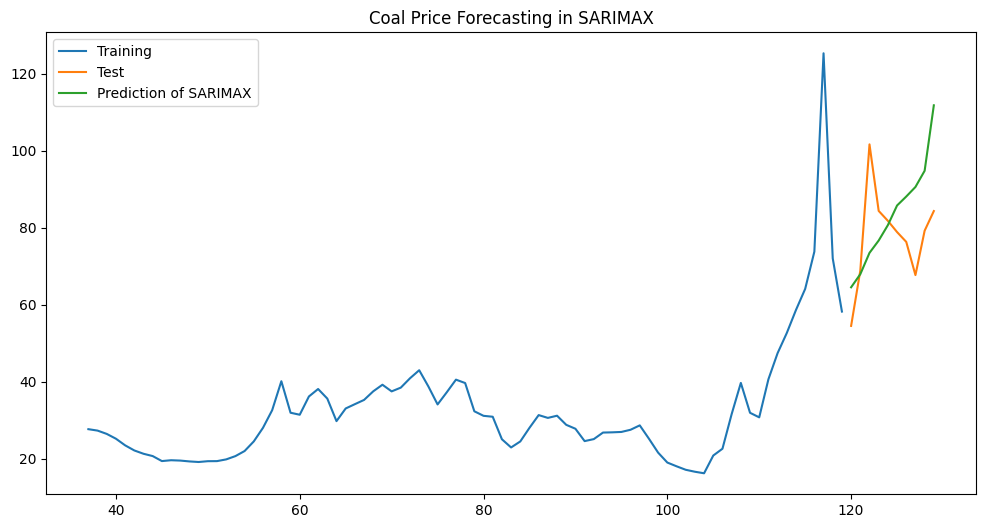

In [ ]:
# Plot SARIMAX
plt.figure(figsize=(12, 6))
plt.plot(train["coal_price"], label = "Training")
plt.plot(test["coal_price"], label = "Test")
plt.plot(test.index, predictions_sarimax, label = "Prediction of SARIMAX")
plt.legend()
plt.title("Coal Price Forecasting in SARIMAX")
plt.show()

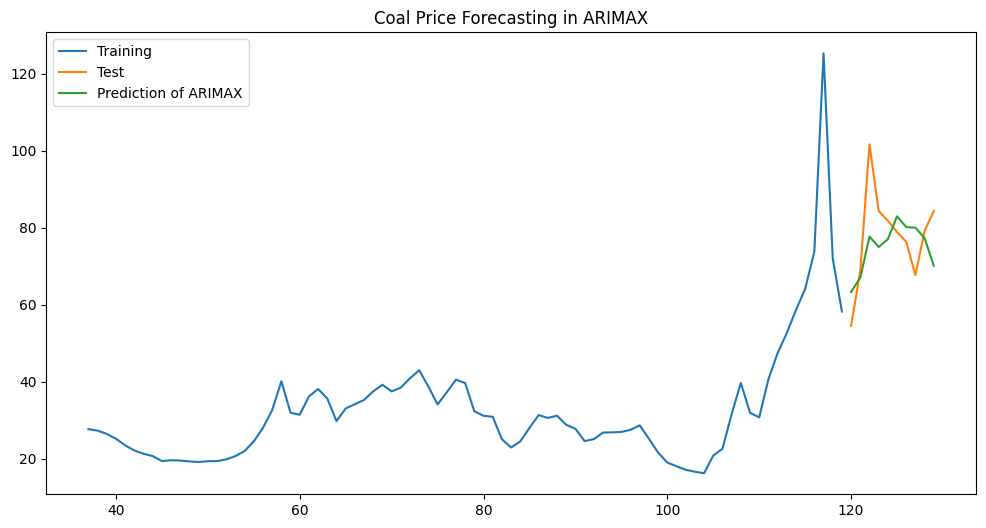

In [ ]:
# Plot ARIMAX
plt.figure(figsize=(12, 6))
plt.plot(train["coal_price"], label = "Training")
plt.plot(test["coal_price"], label = "Test")
plt.plot(test.index, predictions_arimax, label = "Prediction of ARIMAX")
plt.legend()
plt.title("Coal Price Forecasting in ARIMAX")
plt.show()

# SARIMAX PARAMETERS :
# Order : (p, d, q)
- p = AR order, menunjukkan jumlah lags yang akan digunakan model
- d = I (Integrated), selisih angka yang dibutuhkan agar data waktu menjadi stationary
- q = MA (Moving Average), menunjukkan jumlah angka dari forecast eror yang harus dimasukkan ke ARIMA model

## Seasonal_order : (P, D, Q, m)
- P = Seasonal AR order
- D = Seasonal I oreder
- Q = Seasonal MA order
- m = Seasonal Periodicity --> jumlah periode dalam sebuah season misalkan jika data adalah bulanan dan punya seasonality tahunan maka m = 12

In [ ]:
# Grid Search
import itertools # Library untuk iterasi
p = d = q = range(0,3)
pdq = list(itertools.product(p, d, q)) # Membuat semua kombinasi yang berbeda
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [ ]:
from matplotlib.artist import Parameter
# Akaike Information Criterion : evaluasi model statistical dari sebuah dataset,
# untuk menentukan model terbaik dari kombinasi parameternya
aic = float("inf")

for parameter in pdq:
  for parameter_seasonal in seasonal_pdq :
    try:
      model = SARIMAX(train["coal_price"],
                      exog = train[["china_import_from_indonesia",
                                    "indonesia_production",
                                    "china_production"]],
                      order = parameter,
                      seasonal_order = parameter_seasonal)

      results = model.fit()

      if results.aic < aic:
         aic = results.aic
         best_order = Parameter
         best_seasonal_order = parameter_seasonal

    except:
      continue

print("Best SARIMAX parameters : order = {}, seasonal_order = {}".format(best_order, best_seasonal_order))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maxim

Best SARIMAX parameters : order = <class 'inspect.Parameter'>, seasonal_order = (1, 2, 0, 12)


In [ ]:
print(p)
print(d)
print(q)

range(0, 3)
range(0, 3)
range(0, 3)
